<a href="https://colab.research.google.com/github/shubham7226/005_ShubhamBaldaniya/blob/main/005_Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries


In [1]:
import numpy as np 
import pandas as pd 
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Prepare Data

In [2]:
dataset=datasets.load_breast_cancer()
dataset

print(dataset.data.shape)
print(dataset.target.shape)


(569, 30)
(569,)


# K-Mean Model

In [3]:
kmeans = KMeans(n_clusters=10, random_state=5)
prediction = kmeans.fit_predict(dataset.data)
print(prediction)

kmeans.cluster_centers_.shape
print(kmeans.cluster_centers_)

[8 8 1 0 1 4 1 2 4 4 5 5 5 2 4 2 2 5 8 4 4 9 2 6 8 5 2 5 5 5 1 4 5 1 5 5 2
 0 4 4 4 0 1 2 4 1 9 4 0 4 0 4 0 5 2 0 8 2 4 9 9 9 2 9 2 2 9 0 9 0 1 9 1 4
 0 5 4 1 1 4 0 4 6 5 0 1 2 1 0 2 2 2 4 4 2 1 0 9 0 2 2 9 0 9 9 4 0 0 6 0 9
 0 4 9 9 0 9 2 5 5 0 1 6 4 4 4 2 1 4 1 0 5 5 2 1 4 0 0 2 0 9 5 0 4 0 0 0 2
 4 4 4 9 9 0 4 0 5 2 0 0 0 1 8 0 6 2 9 5 1 2 0 2 2 9 9 9 9 2 4 0 3 8 5 0 2
 9 5 0 0 0 4 0 9 4 2 4 4 5 1 2 4 5 6 2 4 2 9 5 4 2 1 0 6 5 4 4 0 9 8 8 4 4
 9 2 4 2 9 2 4 4 5 0 0 8 9 4 3 1 4 5 4 0 0 4 1 9 4 4 0 0 8 0 8 5 8 2 8 2 5
 2 1 5 5 2 5 3 9 4 0 9 4 0 6 9 5 0 0 5 4 4 1 0 1 2 0 0 0 0 0 0 4 2 0 0 0 4
 9 0 2 9 8 0 1 9 0 0 4 9 4 4 0 2 4 0 9 0 0 1 9 0 9 1 0 8 0 0 4 0 5 2 2 4 0
 0 0 5 0 1 9 3 2 9 0 1 0 9 0 2 0 0 0 2 3 2 0 0 0 4 9 9 0 4 0 2 4 1 1 0 3 8
 5 2 1 8 4 2 9 4 4 0 0 0 0 0 4 4 0 4 0 5 9 9 5 8 0 4 4 0 0 0 5 0 4 0 0 0 2
 4 5 0 0 0 9 2 2 0 9 1 0 0 0 2 0 4 9 9 9 0 0 0 2 0 1 1 2 2 4 4 4 4 0 5 4 9
 5 0 5 2 2 8 0 1 0 4 4 4 0 4 4 9 1 7 4 0 4 4 4 9 5 0 9 0 2 0 9 4 2 4 0 2 0
 2 4 4 2 0 2 1 0 5 0 5 5 

#Scatter plot of the data points

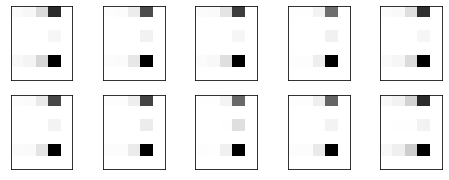

In [4]:
# Scatter plot of the data points
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 6, 5)
for axi, center in zip(ax.flat, centers):
  axi.set(xticks=[], yticks=[])
  axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [5]:
import numpy as np
from scipy.stats import mode
labels = np.zeros_like(prediction)
for i in range(10):
  mask = (prediction == i)
  labels[mask] = mode(dataset.target[mask])[0]

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(dataset.target, labels)

0.8875219683655536

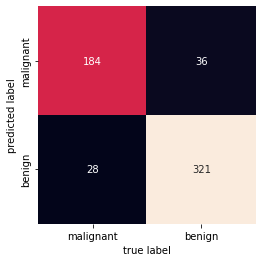

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(dataset.target, labels)
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,xticklabels=dataset.target_names,yticklabels=dataset.target_names)

#ax.set_ylim(10,10)
plt.xlabel('true label')
plt.ylabel('predicted label');